In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings


In [73]:
df_combined = pd.read_csv('combined_df.csv')

## 1. How is the mortality rate attributed to cardiovascular diseases, cancer, diabetes, or respiratory diseases related to death rates from air pollution?

The analysis shows a moderate correlation between mortality rates from non-communicable diseases (like cardiovascular diseases and diabetes) and air pollution-related deaths, particularly for pulmonary diseases and ischemic heart disease. Most data points cluster around low mortality rates for both causes, though some outliers exist. Respiratory infections and stroke show a weaker correlation with non-communicable diseases, while cancer-related deaths due to air pollution appear minimal. In summary, air pollution moderately impacts mortality rates from non-communicable diseases, with the strongest link observed in pulmonary and heart-related conditions.

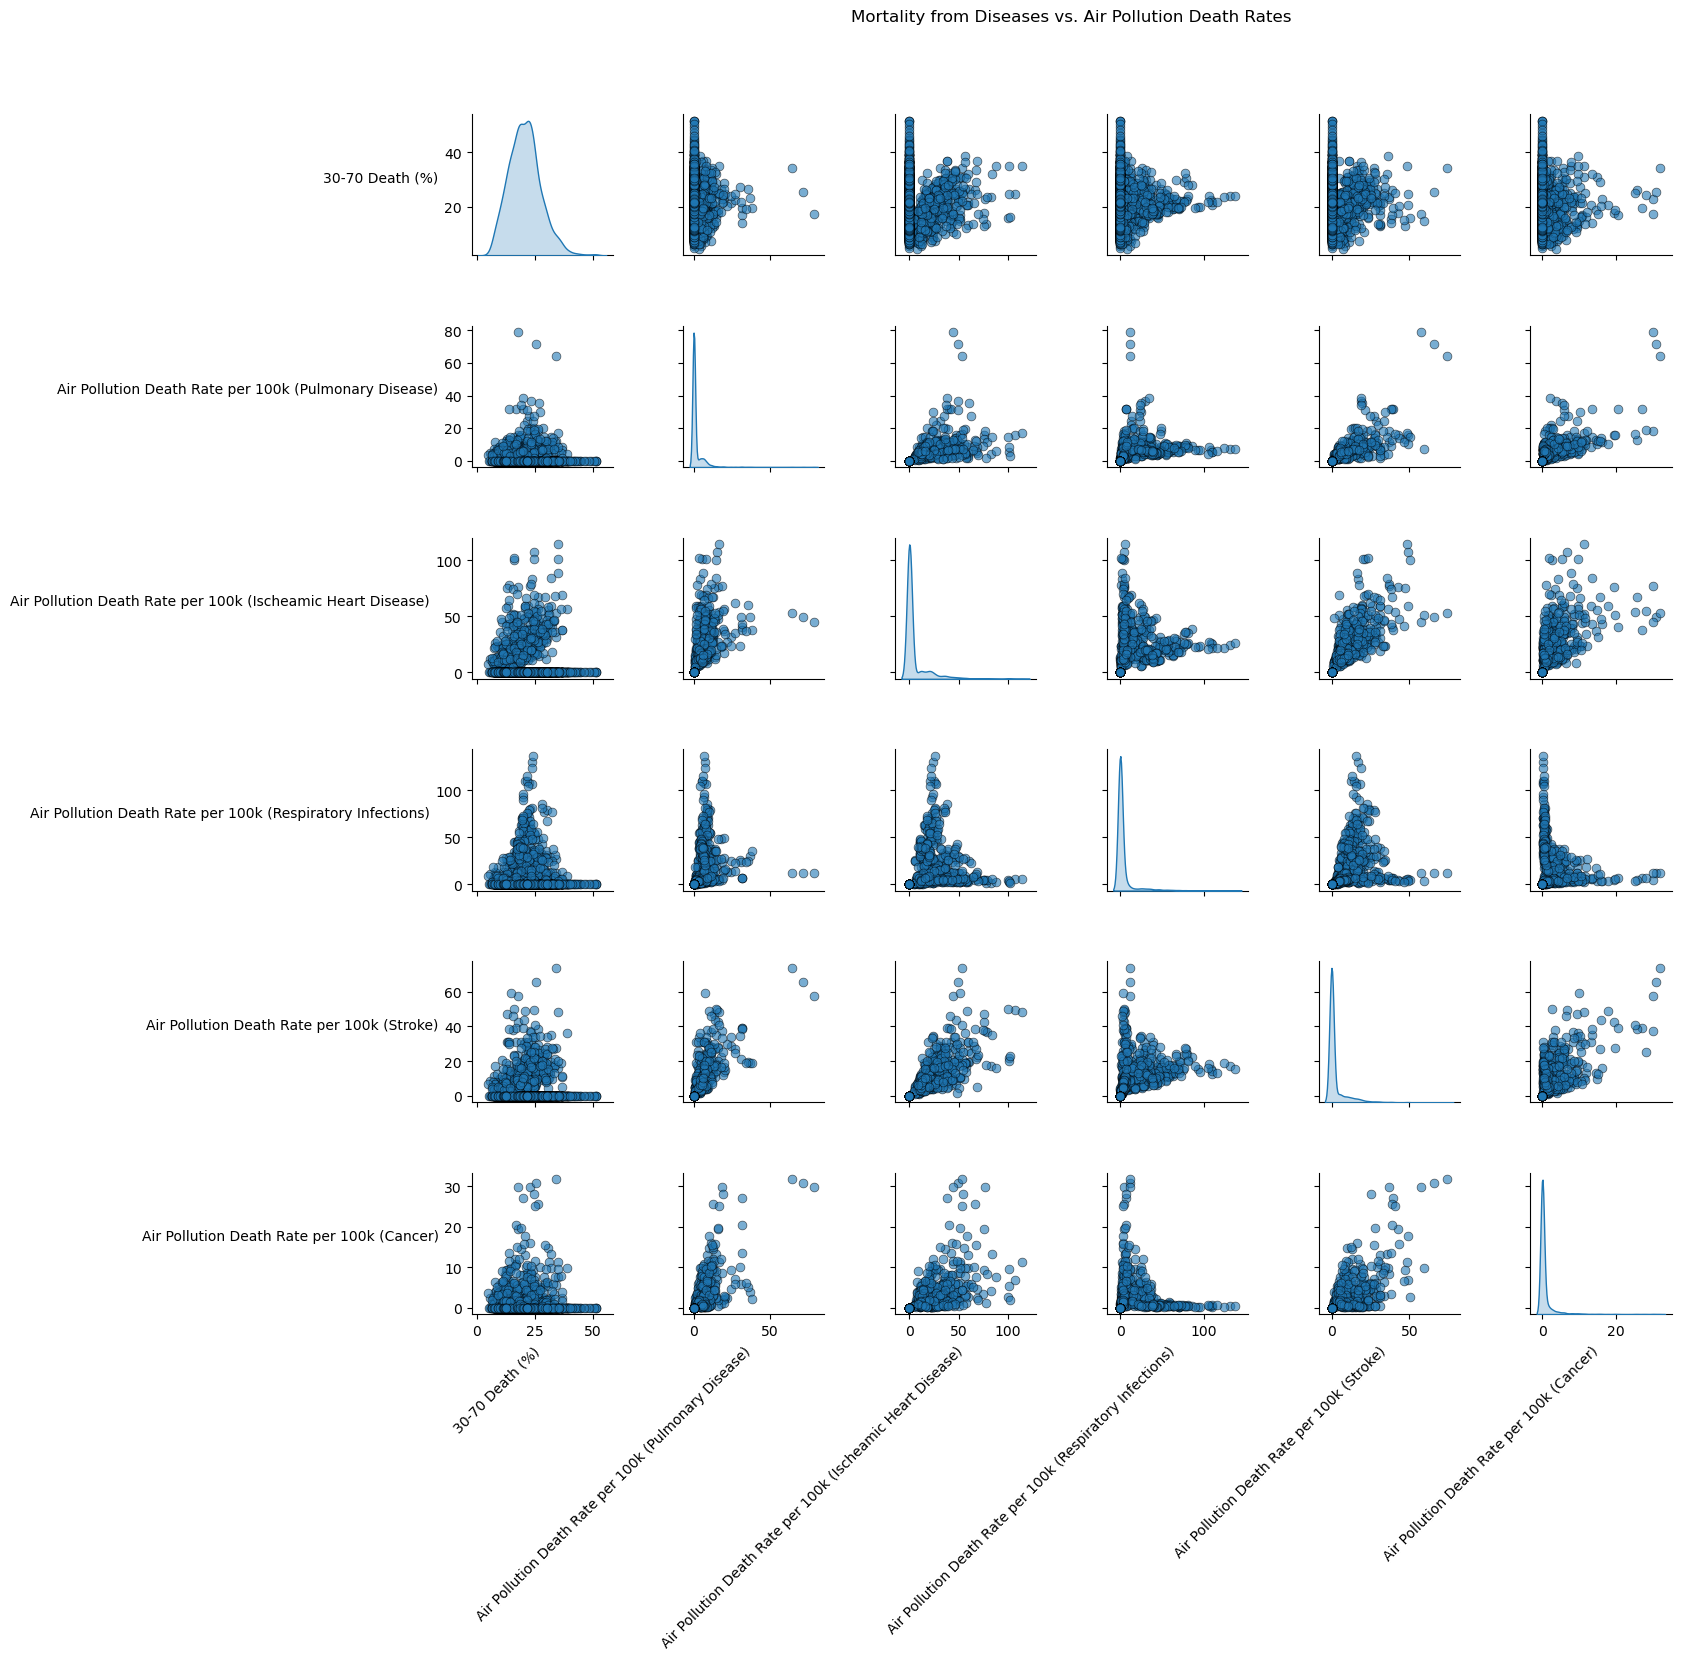

In [74]:
# Filtrar las columnas relevantes
warnings.simplefilter(action='ignore', category=FutureWarning)

df_analysis_1 = df_combined[['30-70 Death (%)', 
                             'Air Pollution Death Rate per 100k (Pulmonary Disease)',
                             'Air Pollution Death Rate per 100k (Ischeamic Heart Disease)',
                             'Air Pollution Death Rate per 100k (Respiratory Infections)',
                             'Air Pollution Death Rate per 100k (Stroke)',
                             'Air Pollution Death Rate per 100k (Cancer)']]

g = sns.pairplot(df_analysis_1, diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'}, height=2.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

plt.suptitle('Mortality from Diseases vs. Air Pollution Death Rates', y=1.02)
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.1, right=0.9, hspace=0.5, wspace=0.5)
plt.show()

## 2. What is the relationship between life expectancy and mortality rates from cardiovascular diseases, cancer, diabetes, and respiratory diseases?
The scatterplot reveals a clear negative correlation between life expectancy and mortality rates from non-communicable diseases. As the mortality rate increases, life expectancy tends to decrease. Countries with lower mortality rates (around 10-15%) generally have life expectancies between 70-80 years. In contrast, regions with higher mortality rates (up to 50%) tend to have significantly lower life expectancies. Overall, the data highlights the substantial impact of non-communicable diseases on reducing life expectancy.

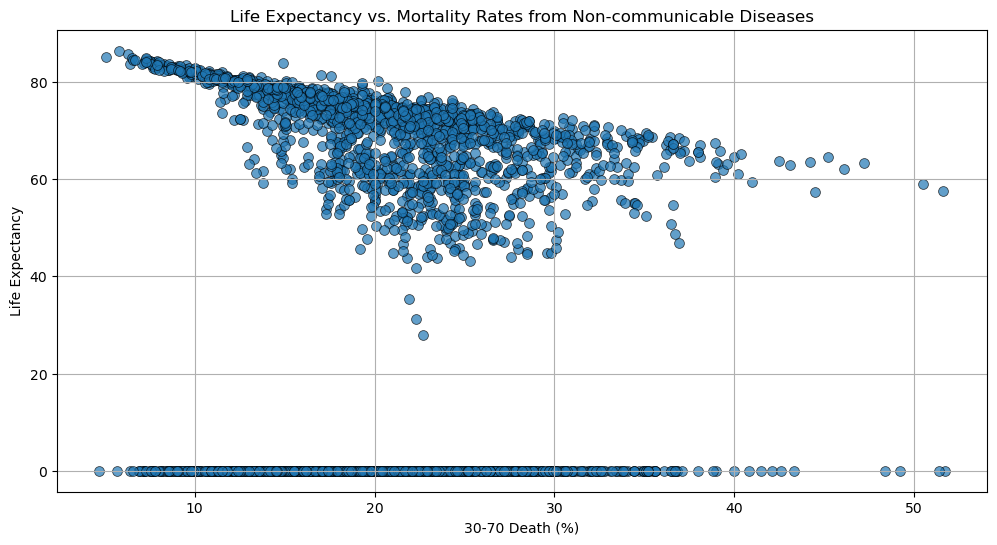

In [75]:
df_life_expectancy_analysis = df_combined[['Life Expectancy', '30-70 Death (%)']]
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_life_expectancy_analysis, x='30-70 Death (%)', y='Life Expectancy', s=50, edgecolor='k', alpha=0.7)
plt.title('Life Expectancy vs. Mortality Rates from Non-communicable Diseases')
plt.xlabel('30-70 Death (%)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

## 3. What is the correlation between tobacco consumption and mortality rates from cardiovascular diseases, cancer, diabetes, or respiratory diseases?

The scatterplot shows a weak correlation between tobacco consumption and mortality rates from non-communicable diseases. Most data points are concentrated at lower tobacco consumption levels (0-40%) and mortality rates between 10-30%. While a slight upward trend is observed, the relationship is not strong or clear. Outliers with higher tobacco consumption (above 60%) do not show a significant increase in mortality. This suggests that factors beyond tobacco consumption, such as healthcare access or lifestyle, also play a role in mortality rates from these diseases.

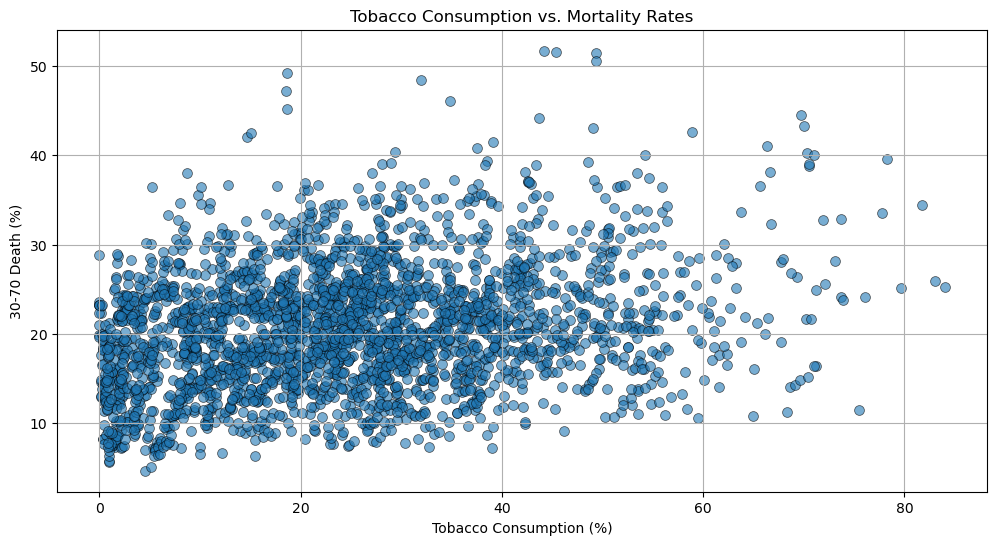

In [76]:
df_tabaco = pd.read_csv('/Users/davidflores/Develop/Aprendizaje/Develop/Tecnologico Monterrey/Challenge/Project 3/Project_3_OK/Resourse_Data/archive (2)/tobaccoAge15_ok.csv')
df_tobacco_analysis = pd.merge(df_combined[['30-70 Death (%)']], df_tabaco[['First Tooltip']], left_index=True, right_index=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_tobacco_analysis, x='First Tooltip', y='30-70 Death (%)', s=50, edgecolor='k', alpha=0.6)
plt.title('Tobacco Consumption vs. Mortality Rates')
plt.xlabel('Tobacco Consumption (%)')
plt.ylabel('30-70 Death (%)')
plt.grid(True)
plt.show()

## 4.How is the mortality rate from non-communicable diseases related to health service coverage?

The bar plot reveals a mixed relationship between health service coverage and mortality rates from non-communicable diseases. While most mortality rates cluster between 15% and 25%, this distribution appears across both low (20-50%) and high (70%+) health service coverage levels. Even regions with high health service coverage show significant variability in mortality rates. This suggests that other factors, such as the quality of services or socio-economic conditions, may play a more crucial role in determining mortality rates than the overall coverage percentage alone.

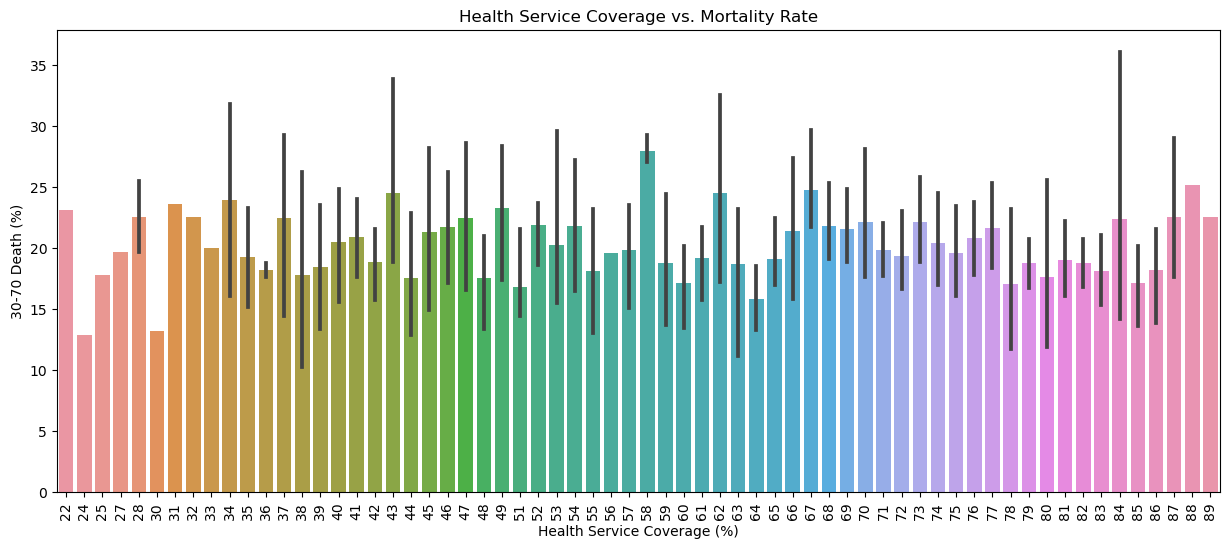

In [77]:
df_uhc = pd.read_csv('/Users/davidflores/Develop/Aprendizaje/Develop/Tecnologico Monterrey/Challenge/Project 3/Project_3_OK/Resourse_Data/archive (2)/uhcCoverage.csv')
df_uhc_analysis = pd.merge(df_combined[['30-70 Death (%)']], df_uhc[['First Tooltip']], left_index=True, right_index=True)
plt.figure(figsize=(15,6))
sns.barplot(data=df_uhc_analysis, x='First Tooltip', y='30-70 Death (%)')
plt.title('Health Service Coverage vs. Mortality Rate')
plt.xlabel('Health Service Coverage (%)')
plt.ylabel('30-70 Death (%)')
plt.xticks(rotation=90)
plt.show()

## 5. Which countries with high mortality rates from cardiovascular diseases, cancer, diabetes, or respiratory diseases have fewer doctors available per 10,000 inhabitants?

The scatterplot reveals a moderate negative correlation between the number of doctors per 10,000 inhabitants and mortality rates from non-communicable diseases. Generally, countries with fewer than 20 doctors per 10,000 inhabitants show higher mortality rates (around 20-30%). As the number of doctors increases, mortality rates tend to decrease. However, some regions with over 40 doctors per 10,000 inhabitants still experience relatively high mortality rates, suggesting that while doctor availability is important, other factors may also influence mortality outcomes.

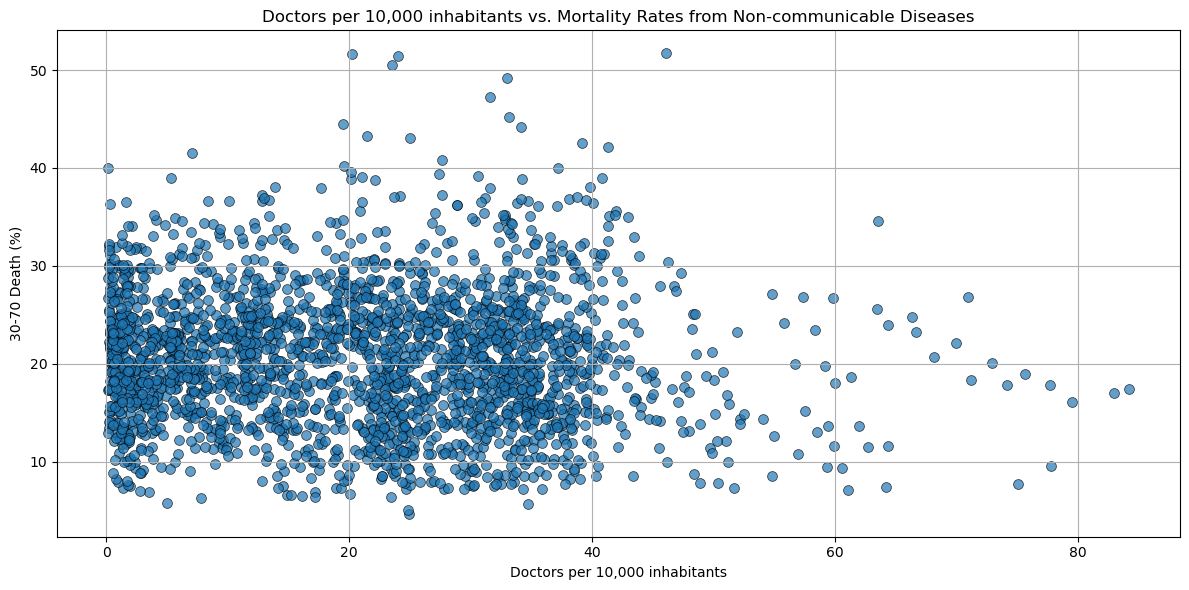

In [78]:
df_doctors = pd.read_csv('/Users/davidflores/Develop/Aprendizaje/Develop/Tecnologico Monterrey/Challenge/Project 3/Project_3_OK/Resourse_Data/archive (2)/medicalDoctors.csv')
df_doctors_analysis = pd.merge(df_combined[['30-70 Death (%)']], df_doctors[['First Tooltip']], left_index=True, right_index=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_doctors_analysis, x='First Tooltip', y='30-70 Death (%)', s=50, edgecolor='k', alpha=0.7)
plt.title('Doctors per 10,000 inhabitants vs. Mortality Rates from Non-communicable Diseases')
plt.xlabel('Doctors per 10,000 inhabitants')
plt.ylabel('30-70 Death (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. How does reliance on clean fuels affect mortality from cardiovascular diseases, cancer, diabetes, or respiratory diseases?
The box plot reveals a diverse distribution of mortality rates in relation to clean fuel reliance. While median mortality rates (20-25%) remain relatively stable across different levels of clean fuel reliance, there is wide variability in the data. Some countries with high clean fuel reliance still exhibit higher mortality rates, and vice versa. The presence of numerous outliers suggests that other factors, beyond clean fuel use, significantly influence mortality from non-communicable diseases. In summary, there is no strong, clear relationship between clean fuel reliance and mortality rates.

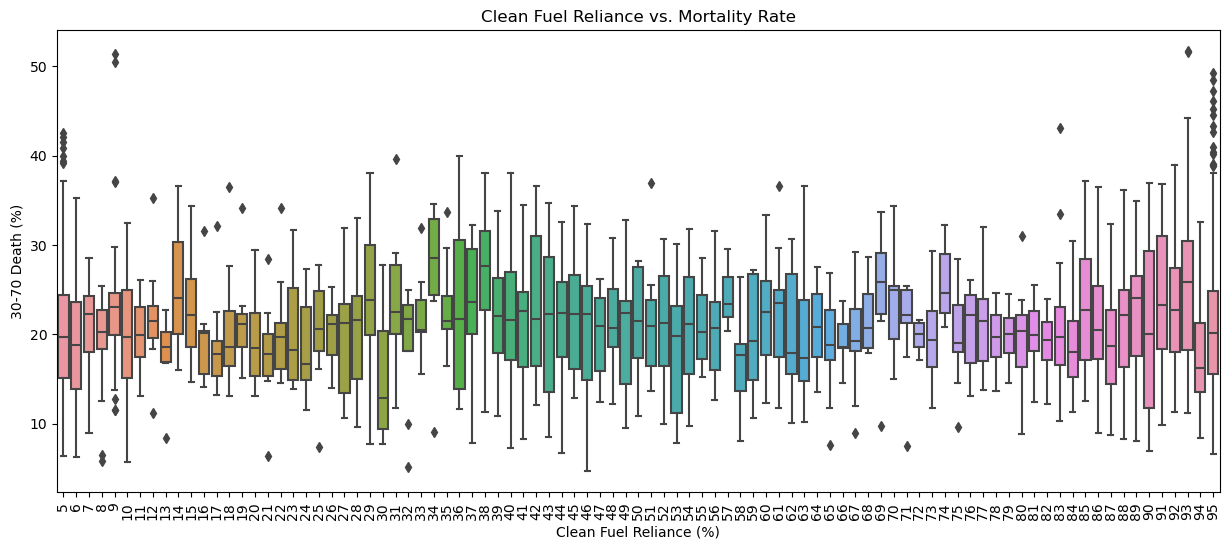

In [79]:
df_clean_fuels = pd.read_csv('/Users/davidflores/Develop/Aprendizaje/Develop/Tecnologico Monterrey/Challenge/Project 3/Project_3_OK/Resourse_Data/archive (2)/cleanFuelAndTech.csv')
df_clean_fuels_analysis = pd.merge(df_combined[['30-70 Death (%)']], df_clean_fuels[['First Tooltip']], left_index=True, right_index=True)
plt.figure(figsize=(15,6))
sns.boxplot(data=df_clean_fuels_analysis, x='First Tooltip', y='30-70 Death (%)')
plt.title('Clean Fuel Reliance vs. Mortality Rate')
plt.xlabel('Clean Fuel Reliance (%)')
plt.ylabel('30-70 Death (%)')
plt.xticks(rotation=90)
plt.show()

## 7. Which countries with high infant mortality rates have low health service coverage?

The bar plot shows that countries with low health service coverage (below 50%) tend to have higher infant mortality rates, exceeding 100 deaths per 1,000 live births. In particular, countries with health coverage between 20% and 40% exhibit the highest mortality rates. As health service coverage increases (50%-80%), infant mortality rates generally decrease, though some variation remains. Overall, countries with lower health service coverage experience significantly higher infant mortality, indicating that improved coverage is a key factor in reducing infant mortality rates.

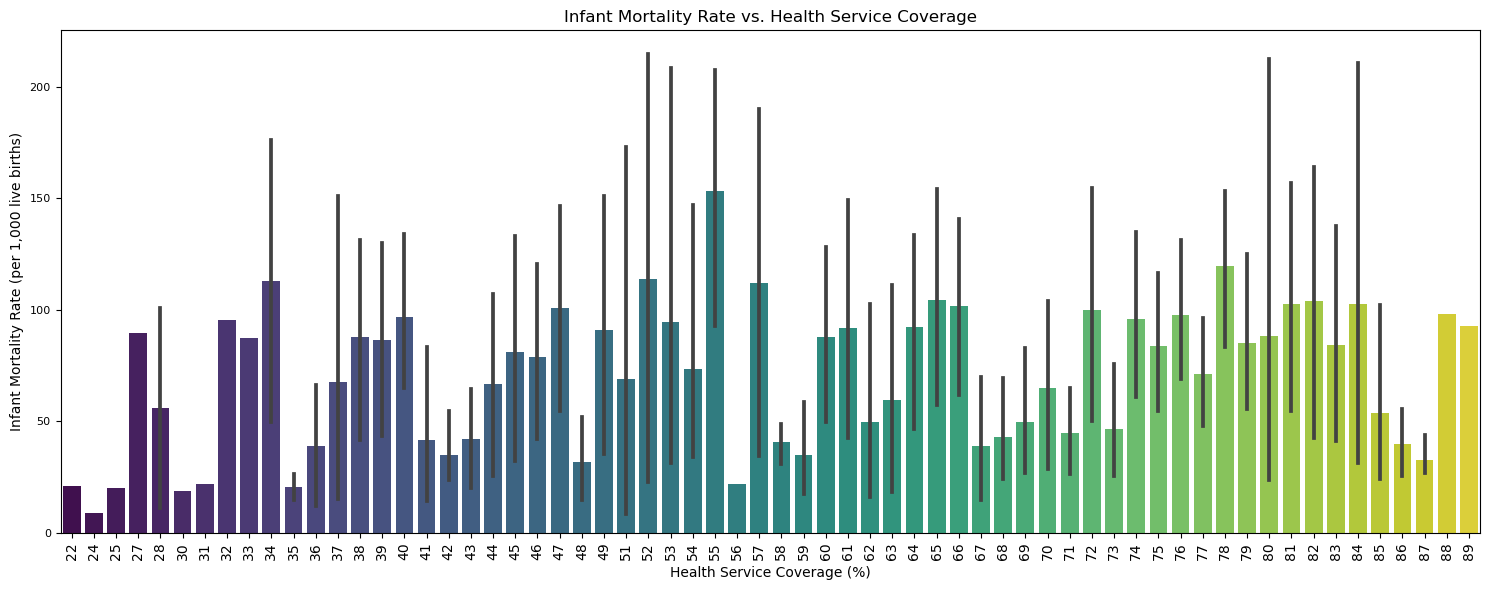

In [80]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_infant_uhc_analysis, x='First Tooltip_y', y='First Tooltip_x', palette='viridis')
plt.title('Infant Mortality Rate vs. Health Service Coverage')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.xlabel('Health Service Coverage (%)')
plt.yticks(fontsize=8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 8. How are alcohol consumption rates related to cancer?

The scatter plot illustrates the relationship between alcohol consumption rates and cancer mortality rates. While there appears to be a slight positive correlation, as alcohol consumption increases, cancer mortality rates tend to vary widely without a consistent trend. Most data points cluster within lower alcohol consumption percentages, suggesting that high levels of alcohol consumption do not directly correlate with a significant increase in cancer mortality rates, indicating that other factors may also play a crucial role in cancer outcomes.

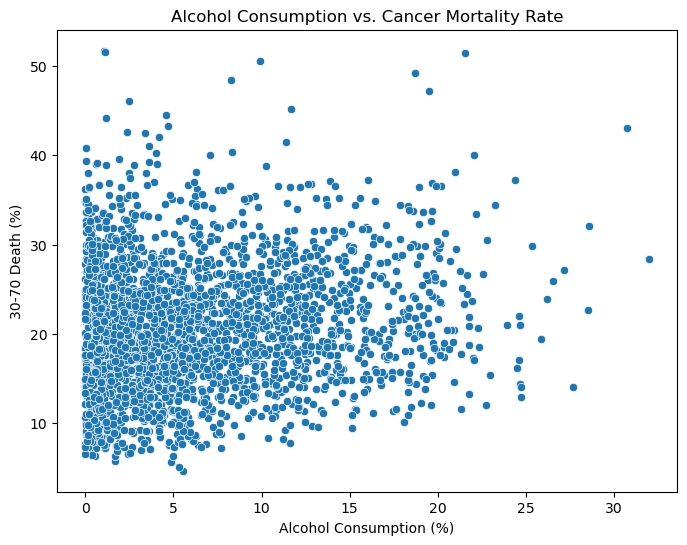

In [81]:
df_alcohol = pd.read_csv('/Users/davidflores/Develop/Aprendizaje/Develop/Tecnologico Monterrey/Challenge/Project 3/Project_3_OK/Resourse_Data/archive (2)/alcoholSubstanceAbuse_OK.csv')
df_alcohol_analysis = pd.merge(df_combined[['30-70 Death (%)']], df_alcohol[['First Tooltip']], left_index=True, right_index=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_alcohol_analysis, x='First Tooltip', y='30-70 Death (%)')
plt.title('Alcohol Consumption vs. Cancer Mortality Rate')
plt.xlabel('Alcohol Consumption (%)')
plt.ylabel('30-70 Death (%)')
plt.show()